- [x] Top 5 most popular artists
- [x] Top 5 loudest tracks
- [x] Artist with the most danceability song
- [ ] To 10 instrumentalness tracks
- [ ] Multiple feature plots
- tempo
- loudness
- acousticness
- danceability
- duration
- energy
- instrumentalness
- liveness
- speechiness
- valence

# Self Assesment
- [x] Top 10 energetic tracks
- [x] Most common durations 
- [ ] Most popular artist
- [x] Top  10 tracks with the most valence

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Kunwa\OneDrive\Desktop\Data Science\Data Science Course Project\Data\spotify\data.csv')

In [3]:
df.head(10)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


# Data Cleaning

In [5]:
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [7]:
df.shape

(2017, 16)

In [8]:
df.columns.nunique()

16

In [9]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# Data Analysis

### Top 5 most popular artists

In [10]:
top_five_artists = df.groupby('artist').count().sort_values(by='song_title',ascending=False)
t5 = top_five_artists['song_title'].head()
t5

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

<Axes: title={'center': 'Top 5 most popular artists'}, ylabel='Top 5 Artist'>

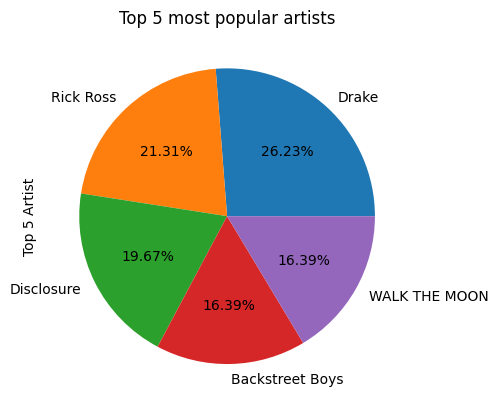

In [11]:
t5.plot(kind='pie',autopct ='%.2f%%',ylabel='Top 5 Artist',title='Top 5 most popular artists')

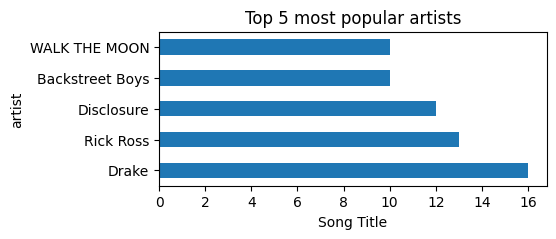

In [12]:
plt.figure(figsize=(5,2))
t5.plot.barh()
plt.xlabel('Song Title')
plt.title('Top 5 most popular artists')
plt.show()

### Top 5 loudest tracks

In [13]:
Top_five_Lt = df[['loudness', 'song_title']].sort_values(by='loudness',ascending=True).head()
Top_five_Lt

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


[Text(0, 0.5, 'Songs'), Text(0.5, 1.0, 'Top 5 loudest tracks')]

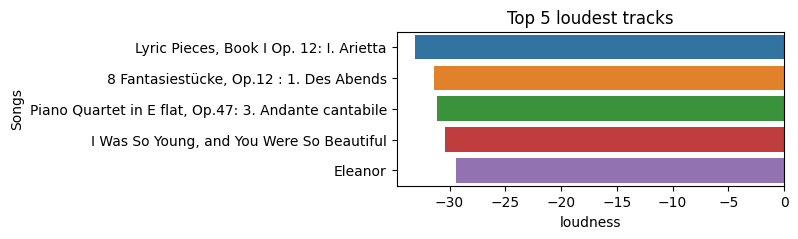

In [14]:
plt.figure(figsize=(5,2))
graph =sns.barplot(x='loudness',y='song_title',data=Top_five_Lt)
graph.set( ylabel = "Songs", title ='Top 5 loudest tracks')

###  Artist with the most danceability song

In [15]:
t5_ads = df[['danceability','song_title','artist']].sort_values(by='danceability',ascending = False).head()
t5_ads 

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


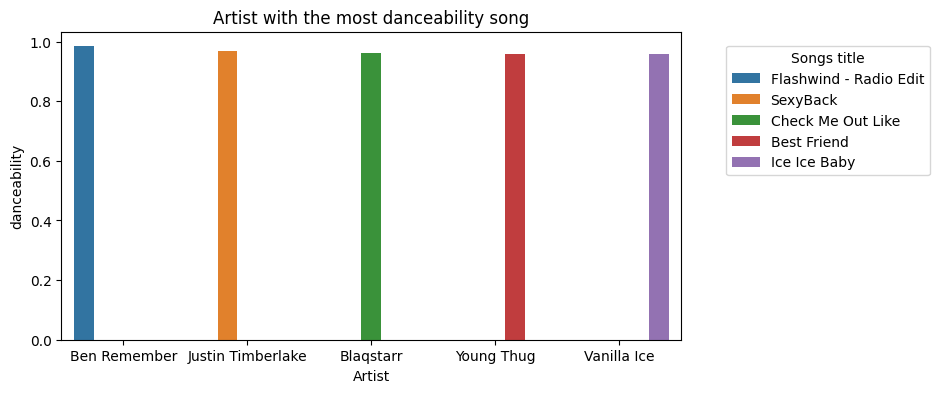

In [16]:
plt.figure(figsize=(8,4))
sns.barplot(data=t5_ads, x='artist', y="danceability",hue='song_title')
plt.title('Artist with the most danceability song')
plt.xlabel('Artist')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=1,title='Songs title')
plt.show()

### To 10 instrumentalness tracks

In [17]:
t5_It = df[['instrumentalness','song_title','artist']].sort_values(by='instrumentalness',ascending = False).head()
t5_It 

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


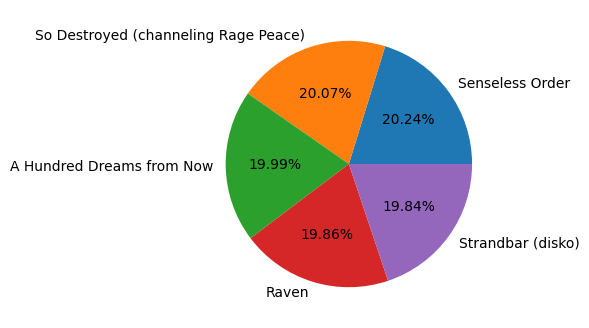

In [18]:
plt.figure(figsize=(8,4))
plt.pie(data=t5_It, x='instrumentalness',autopct = '%.2f%%',labels=t5_It['song_title'])
plt.show()

#  Multiple feature plots

In [19]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [20]:
features = ['tempo','loudness','acousticness','danceability','duration_ms','energy',
            'instrumentalness','liveness','speechiness','valence']

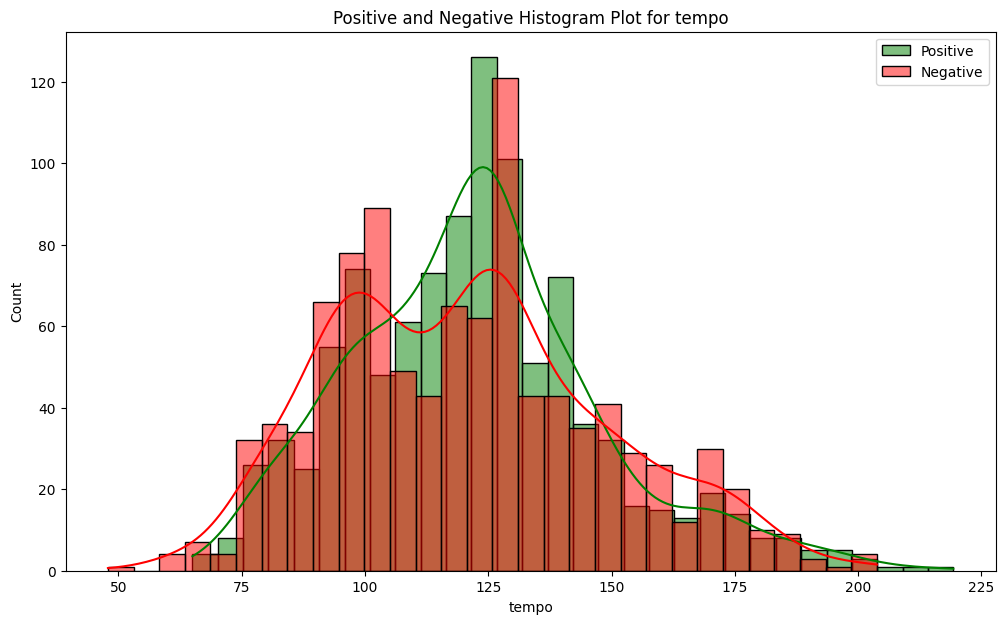

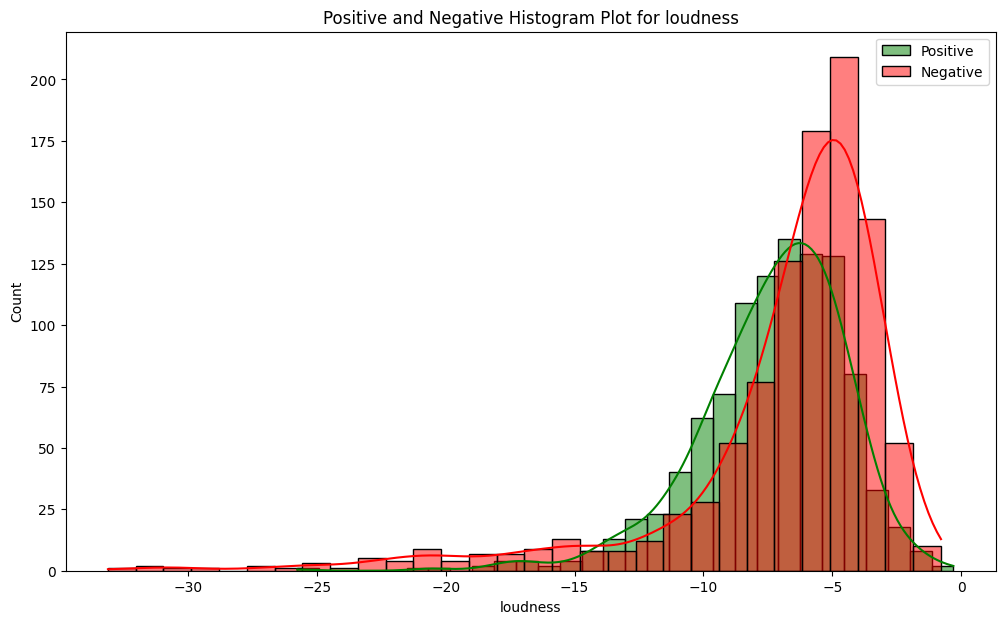

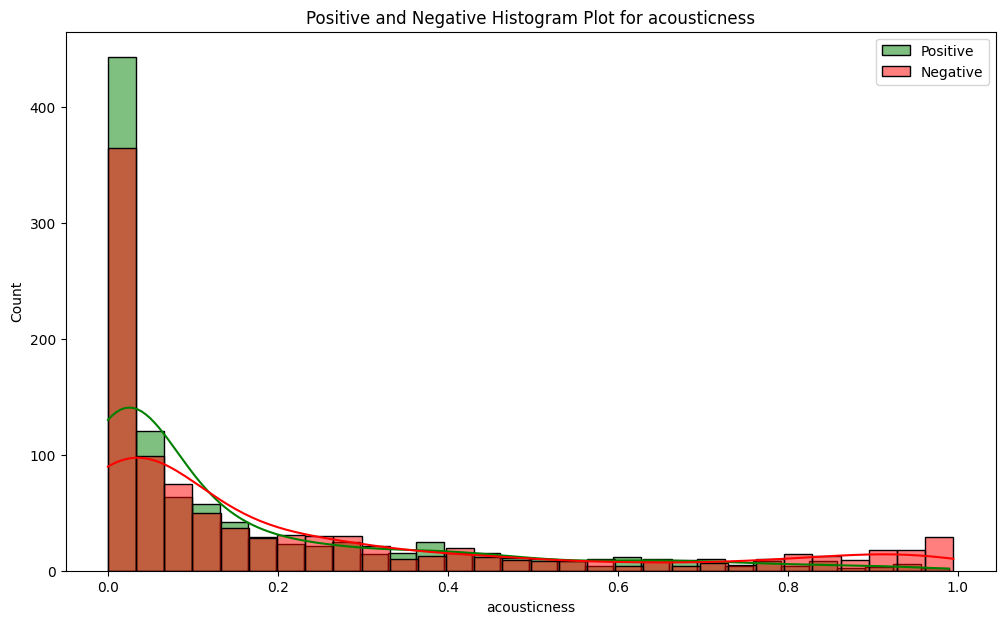

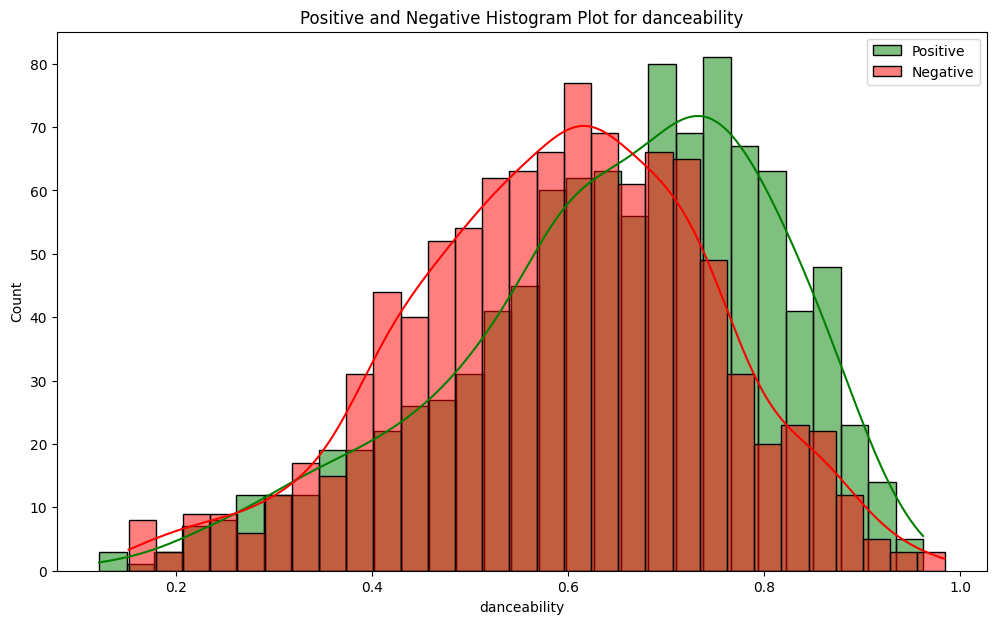

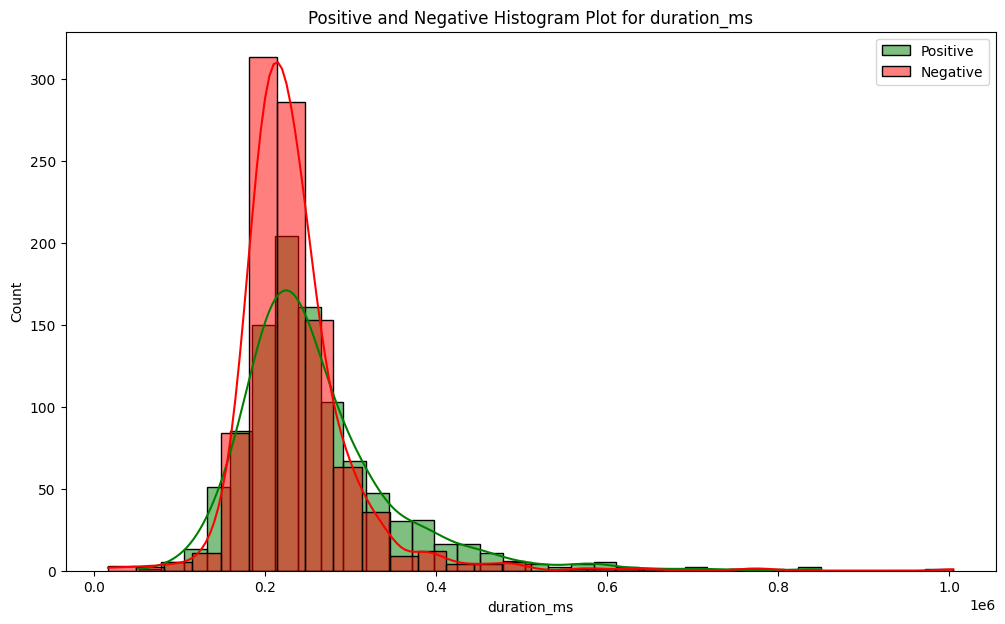

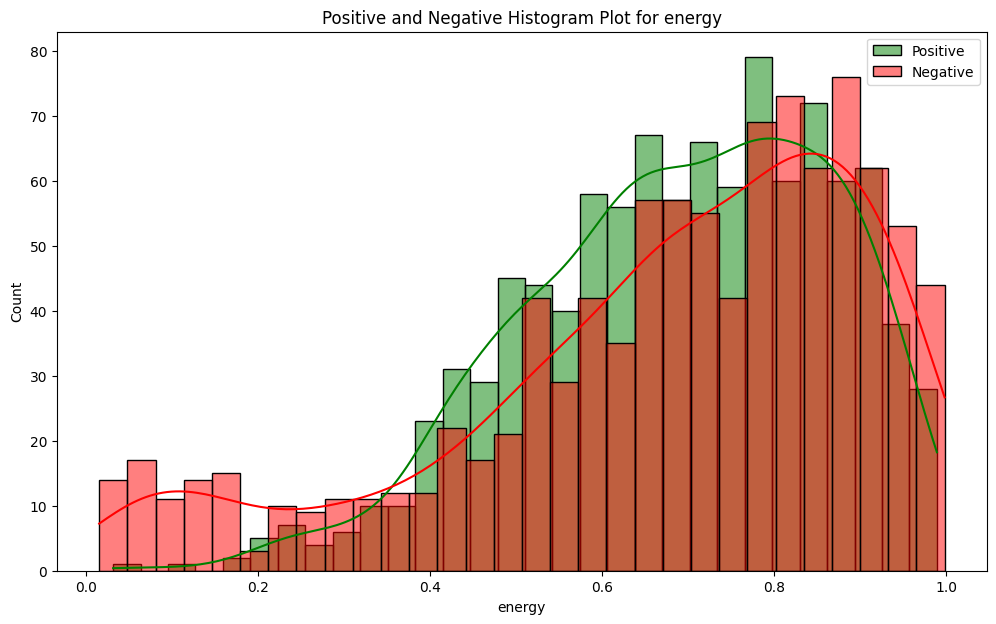

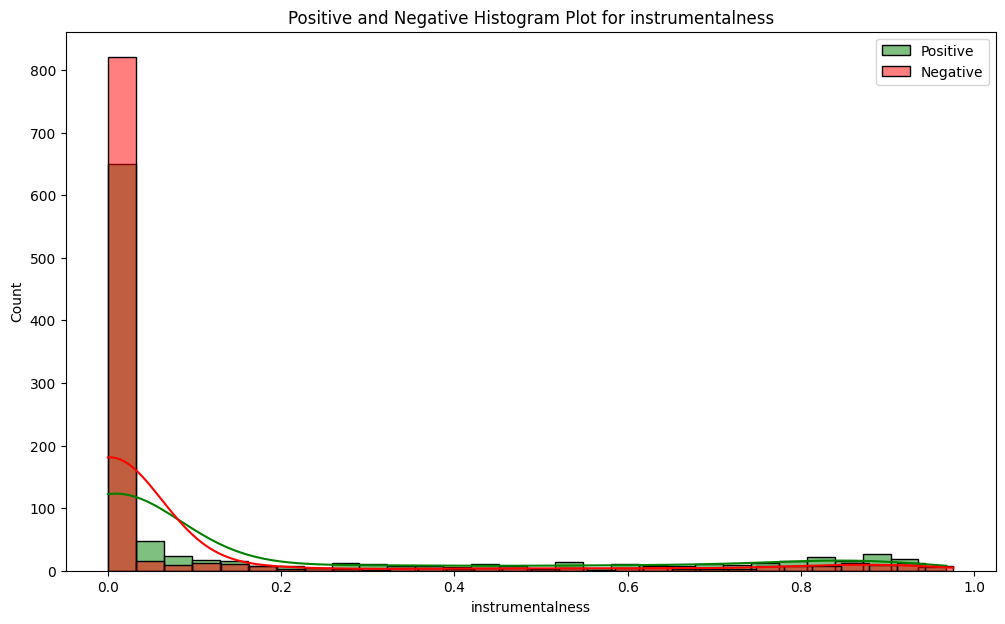

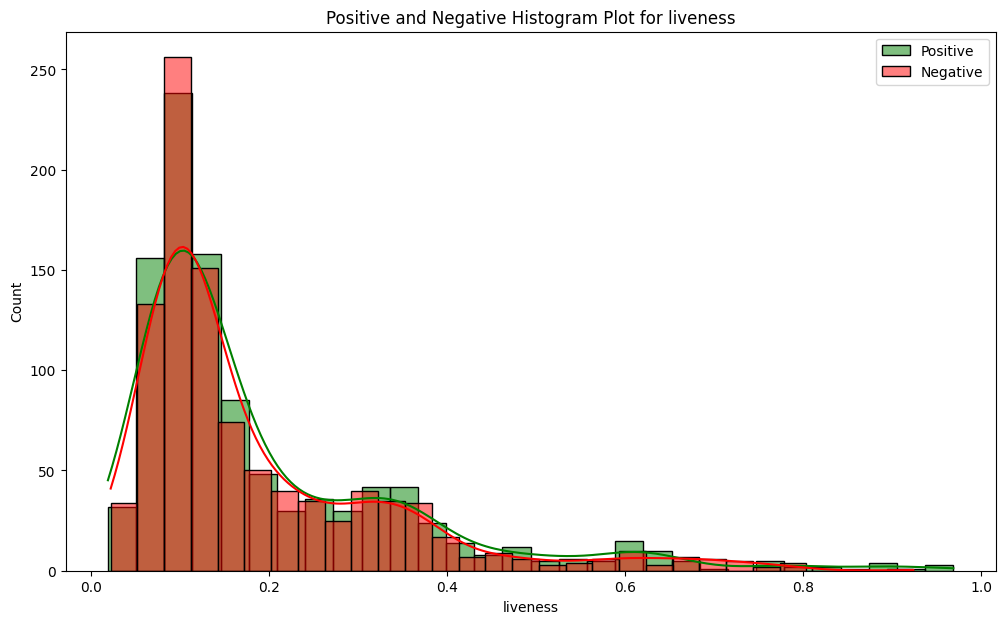

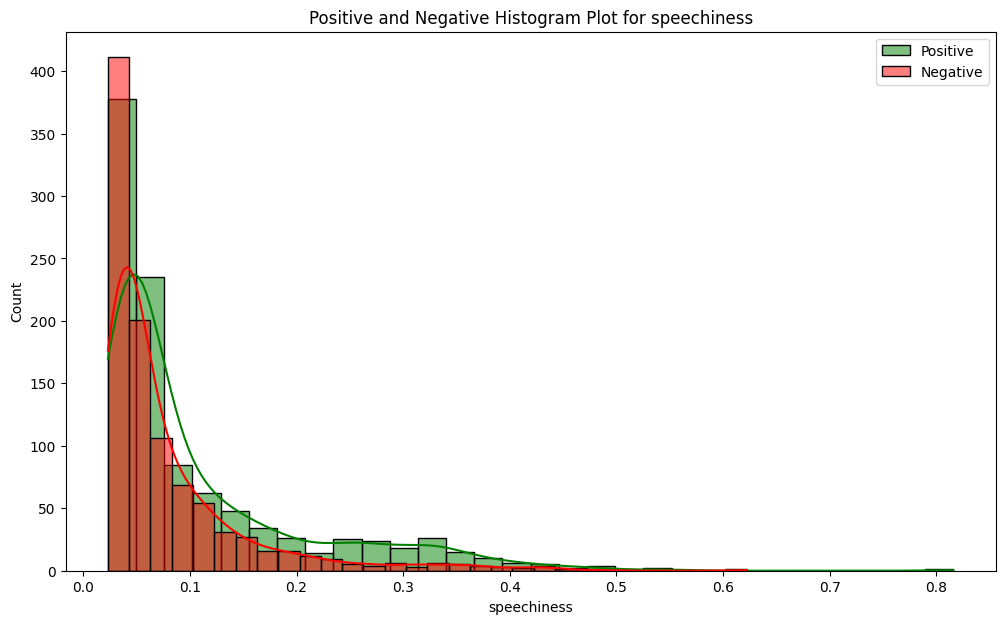

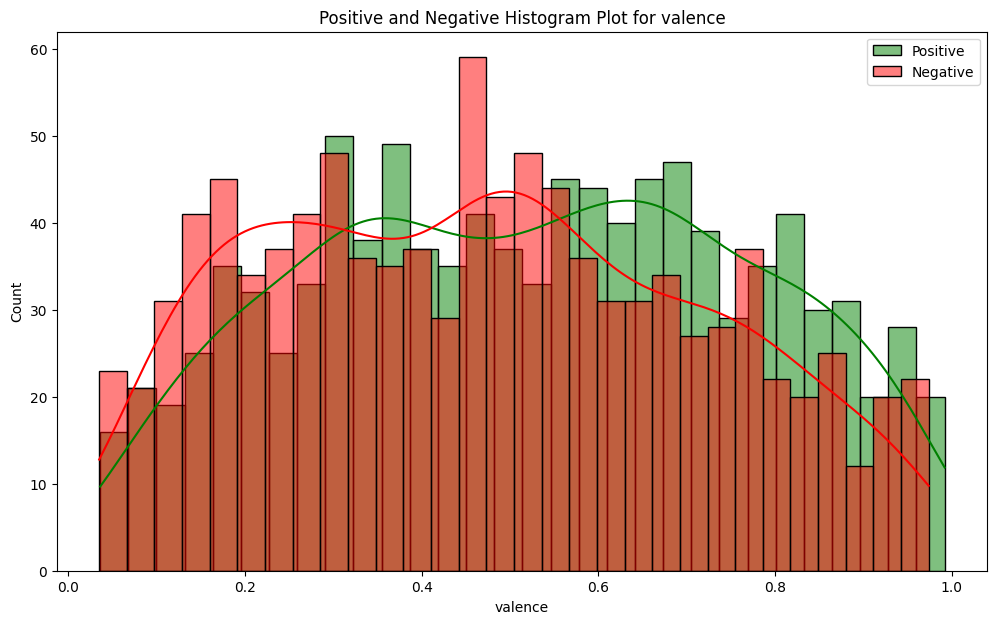

In [21]:
for x in features:
    pos_data = df[df['target'] == 1][x]
    neg_data = df[df['target'] == 0][x]
    plt.figure(figsize=(12,7))
    
    sns.histplot(pos_data, bins=30,label='Positive',color='green',kde=True)
    sns.histplot(neg_data,bins=30,label='Negative',color='red',kde=True)
    plt.legend(loc='upper right')
    plt.title(f'Positive and Negative Histogram Plot for {x}')
    plt.show()

In [22]:
sns.displot?

In [23]:
Top 10 energetic tracks
Most trending genre
Most common durations
Most popular artist
Top 10 tracks with the most valence

SyntaxError: invalid syntax (2291874616.py, line 1)

In [24]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [25]:
energy_Song = df[['energy','song_title','artist']].sort_values(by='energy',ascending = False).head(10)
energy_Song 

,energy,song_title,artist
1299,0.998,No Absolution,Thy Art Is Murder
1322,0.997,Pitchblack,Walking Dead On Broadway
1297,0.994,A Darkened Gospel,A Wake in Providence
1347,0.993,Unanswered,Suicide Silence
2015,0.992,First Contact,Twin Moons
1680,0.992,Paranoia,A Day To Remember
1332,0.992,Beautiful Agony,Within The Ruins
1328,0.991,Down into the Abyss,Conjonctive
1681,0.990,Hated,Beartooth
1296,0.990,Black Colors,Victim Of Deception


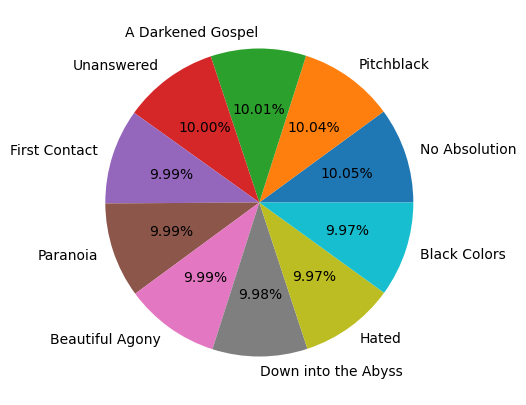

In [26]:
plt.figure(figsize=(10,5))
plt.pie(data=energy_Song, x='energy',autopct = '%.2f%%',labels=energy_Song['song_title'])
plt.show()

### Most common durations

In [39]:
x1 = df['duration_ms'].mode()
x1

0    192000
Name: duration_ms, dtype: int64

In [48]:
df[df['duration_ms'] == 192000]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
536,0.11000,0.438,192000,0.539,0.000000,8,0.1430,-9.578,1,0.1660,166.649,5.0,0.0759,1,Kerosene,Crystal Castles
1064,0.20800,0.501,192000,0.836,0.000000,11,0.1520,-3.587,0,0.0491,159.863,4.0,0.6270,0,How Not To,Dan + Shay
1429,0.30600,0.696,192000,0.795,0.000008,8,0.2430,-4.892,0,0.1870,126.186,4.0,0.1600,0,White Label (Is This Love),Still Young
1615,0.00732,0.623,192000,0.975,0.160000,3,0.0614,-2.632,0,0.1090,125.940,4.0,0.2470,0,Milky Way,Madison Mars
1980,0.00574,0.682,192000,0.812,0.000000,1,0.0553,-2.691,0,0.1180,104.891,4.0,0.3470,0,Shape of You (Major Lazer Remix) [feat. Nyla &...,Ed Sheeran


### Top 10 tracks with the most valence1

In [ ]:
t10_It = df[['valence','song_title']].sort_values(by='valence',ascending = False).head(10)
t10_It 

In [ ]:
sns.lineplot(y = 'valence', x = 'song_title', data = t10_It)
plt.xticks(rotation=45)
plt.show()

### Most popular artist

In [49]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [52]:
df['time_signature'].unique()

array([4., 3., 5., 1.])